<a href="https://colab.research.google.com/github/thalitadru/CoursNNDL/blob/master/LabAssignmentCNNAudio_complete.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import tensorflow as tf
import tensorflow.keras as keras

from IPython import display

In [2]:
import tensorflow_datasets as tfds

In [6]:
data_info = tfds.builder('spoken_digit').info
data_info

tfds.core.DatasetInfo(
    name='spoken_digit',
    full_name='spoken_digit/1.0.9',
    description="""
    A free audio dataset of spoken digits. Think MNIST for audio.
    
    A simple audio/speech dataset consisting of recordings of spoken digits in wav files at 8kHz.
    The recordings are trimmed so that they have near minimal silence at the beginnings and ends.
    
    5 speakers
    2,500 recordings (50 of each digit per speaker)
    English pronunciations
    
    Files are named in the following format: {digitLabel}_{speakerName}_{index}.wav
    """,
    homepage='https://github.com/Jakobovski/free-spoken-digit-dataset',
    data_path='~/tensorflow_datasets/spoken_digit/1.0.9',
    file_format=tfrecord,
    download_size=11.42 MiB,
    dataset_size=45.68 MiB,
    features=FeaturesDict({
        'audio': Audio(shape=(None,), dtype=tf.int64),
        'audio/filename': Text(shape=(), dtype=tf.string),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=10),
    })

This dataset requires the installation of the following package:

In [8]:
!pip install pydub

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [9]:
train_dataset, validation_dataset , test_dataset = tfds.load(
    'spoken_digit', 
    shuffle_files=True,
    as_supervised=True,
    split=['train[:60%]', 'train[60%:80%]', 'train[80%:]'])

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/2500 [00:00<?, ? examples/s]

Shuffling ~/tensorflow_datasets/spoken_digit/1.0.9.incompleteG7T913/spoken_digit-train.tfrecord*...:   0%|    …

Dataset spoken_digit downloaded and prepared to ~/tensorflow_datasets/spoken_digit/1.0.9. Subsequent calls will reuse this data.


In [12]:
train_dataset.cardinality()

<tf.Tensor: shape=(), dtype=int64, numpy=1500>

waveform shape:(1525,), and dtype: <dtype: 'int64'>


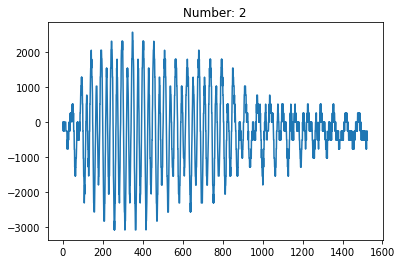

In [39]:
waveform, label = next(iter(train_dataset))
print(f"waveform shape:{waveform.shape}, and dtype: {waveform.dtype}")
plt.plot(waveform)
plt.title(f'Number: {label}')
plt.show()
display.display(display.Audio(waveform, rate=8000))

In [40]:
def get_spectrogram(waveform):
  # Convert the waveform to a spectrogram via a STFT.
  spectrogram = tf.signal.stft(
      waveform, frame_length=255, frame_step=128)
  # Obtain the magnitude of the STFT.
  spectrogram = tf.abs(spectrogram)
  # Add a `channels` dimension, so that the spectrogram can be used
  # as image-like input data with convolution layers (which expect
  # shape (`batch_size`, `height`, `width`, `channels`).
  spectrogram = spectrogram[..., tf.newaxis]
  return spectrogram


spectrogram shape: (10, 129, 1)


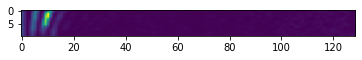

In [41]:
spectrogram = get_spectrogram(tf.cast(waveform, tf.float32) )
print(f"spectrogram shape: {spectrogram.shape}")

In [44]:
def plot_spectrogram(spectrogram, ax):
  if len(spectrogram.shape) > 2:
    assert len(spectrogram.shape) == 3
    spectrogram = np.squeeze(spectrogram, axis=-1)
  # Convert the frequencies to log scale and transpose, so that the time is
  # represented on the x-axis (columns).
  # Add an epsilon to avoid taking a log of zero.
  ax.set_xlabel('time (s)')
  ax.set_ylabel('frequency( Hz)')
  log_spec = np.log(spectrogram.T + np.finfo(float).eps)
  height = log_spec.shape[0]
  width = log_spec.shape[1]
  X = np.linspace(0, np.size(spectrogram), num=width, dtype=int)
  Y = range(height)
  ax.pcolormesh(X, Y, log_spec)

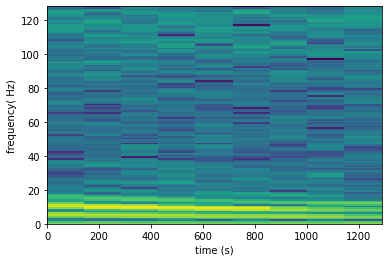

In [45]:
plot_spectrogram(spectrogram, plt.gcf().gca())

In [51]:
def plot_wave_spectre(waveform, spectrogram):
    fig, (ax0,ax1) = plt.subplots(1,2, figsize=(10,4))
    fig.suptitle(f'Number: {label}')
    ax0.plot(waveform)
    plot_spectrogram(spectrogram, ax1)
    fig.show()

Label: tf.Tensor(2, shape=(), dtype=int64)
Waveform shape: (1525,)
Spectrogram shape: (10, 129, 1)
Audio playback


Label: tf.Tensor(1, shape=(), dtype=int64)
Waveform shape: (2929,)
Spectrogram shape: (21, 129, 1)
Audio playback


Label: tf.Tensor(9, shape=(), dtype=int64)
Waveform shape: (6457,)
Spectrogram shape: (49, 129, 1)
Audio playback


Label: tf.Tensor(9, shape=(), dtype=int64)
Waveform shape: (3360,)
Spectrogram shape: (25, 129, 1)
Audio playback


Label: tf.Tensor(7, shape=(), dtype=int64)
Waveform shape: (2746,)
Spectrogram shape: (20, 129, 1)
Audio playback


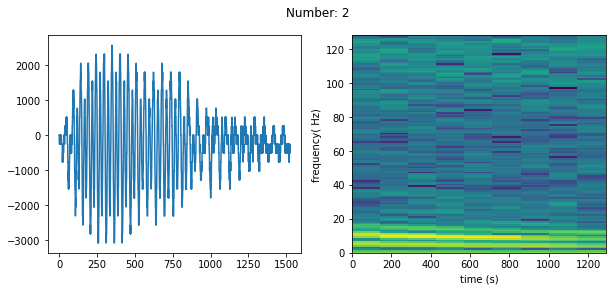

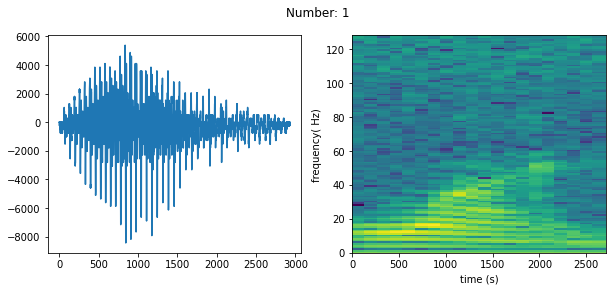

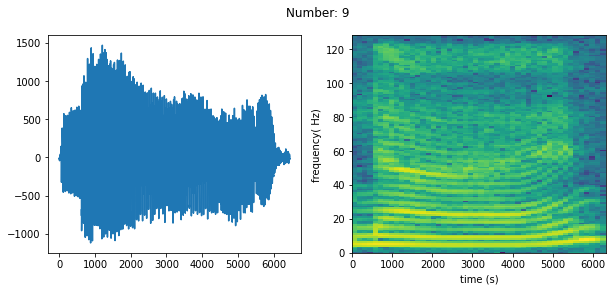

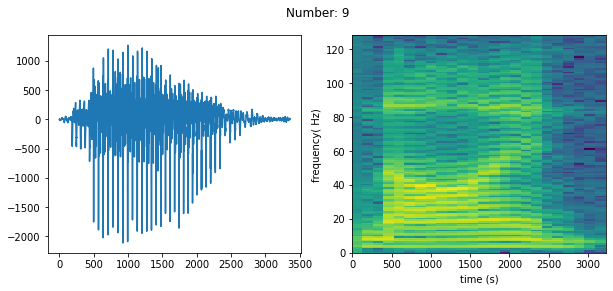

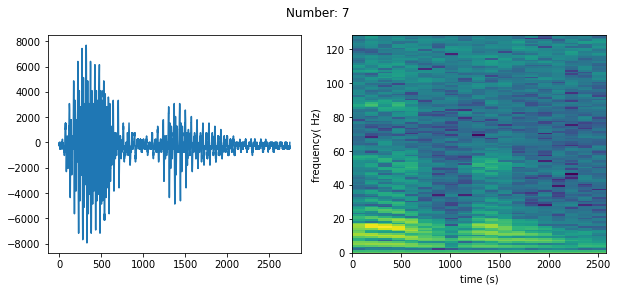

In [53]:
for i, element in enumerate(train_dataset.take(5)):
    waveform, label = element
    waveform = tf.cast(waveform, tf.float64)
    spectrogram = get_spectrogram(waveform)
    # plot_wave_spectre(waveform, spectrogram)
    fig, (ax0,ax1) = plt.subplots(1,2, figsize=(10,4))
    fig.suptitle(f'Number: {label}')
    ax0.plot(waveform)
    plot_spectrogram(spectrogram, ax1)
    fig.show()
    print('Label:', label)
    print('Waveform shape:', waveform.shape)
    print('Spectrogram shape:', spectrogram.shape)
    print('Audio playback')
    display.display(display.Audio(waveform, rate=8000))